# A simple 1-electron, 2d Schrodinger Equation solver

In [1]:
limit = 20
L = 256

In [2]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as la

limit = 20
L = 256
x = np.linspace(-limit, limit, L)
y = np.linspace(-limit, limit, L)

#grid spacing
dx = x[1]-x[0]
dy = y[1]-y[0]

mesh = np.meshgrid(x, y)

In [3]:
block = sp.diags([-1,4,-1], [-1,0,1],(L,L)) #main tri-diagonal
dia = sp.block_diag((block,)*L)  #repeat it num times to create the main block-diagonal
sup = sp.diags([-1],[L],(L**2,L**2)) # super-diagonal fringe
sub = sp.diags([-1],[-L],(L**2,L**2)) #sub-diagonal fringe

T = (dia + sup + sub) / (2*dx*dy)

In [4]:
def solve(potential):
    V = sp.lil_matrix((L**2, L**2))
    V.setdiag(potential.flatten())
    
    H = T + V
    E, psi = la.eigs(H, k=5, which='SM', return_eigenvectors=True)
    
    return E, psi

In [5]:
def V_SHO(mesh,kx,ky,cx=0,cy=0):
    (x,y) = mesh
    V = 0.5 * (kx*(x-cx)**2 + ky*(y-cy)**2)
    return V

/home/kmills/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


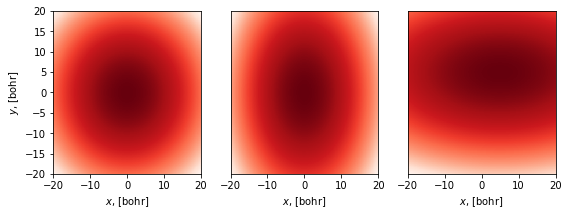

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

#generate three potentials
img0 = V_SHO(mesh, 1, 1, 0, 0)
img1 = V_SHO(mesh, 2, 1, 0, 0)
img2 = V_SHO(mesh, 1, 4, 5, 5)

#plot the potentials
fig, axs = plt.subplots(1,3,figsize=(9,3))
axs[0].pcolormesh(x, y, img0, cmap='Reds_r')
axs[1].pcolormesh(x, y, img1, cmap='Reds_r')
axs[2].pcolormesh(x, y, img2, cmap='Reds_r')
axs[1].set_yticks([])
axs[2].set_yticks([])
_ = [axs[i].set_xlabel(r"$x$, [bohr]") for i in range(3) ]
axs[0].set_ylabel(r"$y$, [bohr]")
fig.show()

In [7]:
np.random.seed(123)
number = 10
kx = np.random.rand(number) * 0.16
ky = np.random.rand(number) * 0.16
cx = (np.random.rand(number) - 0.5) * 16
cy = (np.random.rand(number) - 0.5) * 16

for i in range(number):
    E, psi = solve(V_SHO(mesh, kx[i], ky[i], cx[i], cy[i]))
    numerical = np.real(E[0])
    analytical = 0.5 * (np.sqrt(kx[i]) + np.sqrt(ky[i]))
    print "Numerical: {0:8.5f}\tAnalytical: {1:8.5f}\tError: {2:8.5f}% ".format(numerical, analytical, 100.*np.abs(numerical-analytical)/analytical)

Numerical:  0.28394	Analytical:  0.28407	Error:  0.04505% 
Numerical:  0.27763	Analytical:  0.27775	Error:  0.04499% 
Numerical:  0.22763	Analytical:  0.22771	Error:  0.03597% 
Numerical:  0.19728	Analytical:  0.19736	Error:  0.03810% 
Numerical:  0.29569	Analytical:  0.29582	Error:  0.04650% 
Numerical:  0.30176	Analytical:  0.30191	Error:  0.04734% 
Numerical:  0.28336	Analytical:  0.28351	Error:  0.05051% 
Numerical:  0.24918	Analytical:  0.24928	Error:  0.04248% 
Numerical:  0.28439	Analytical:  0.28451	Error:  0.04380% 
Numerical:  0.27098	Analytical:  0.27109	Error:  0.04195% 
